In [1]:
PROJECT_ROOT = "../"
import sys
# The following line adds the parent directory to the python path.
sys.path.insert(0, PROJECT_ROOT) 

In [2]:
from importlib import reload

import src.experiment.sample_utils as su
import src.experiment.experiment_utils as exp
import src.dataset_handling.pamap.write_pamap as wp
import src.experiment.dataset_experiments.mnist_experiments as m_exp
import src.experiment.experiment_cpu as exp_cpu
import src.experiment.dataset_experiments.cpu_vs_gpu_mnist8m as cpu_vs_gpu

reload(su)
reload(exp)
reload(wp)
reload(m_exp)
reload(exp_cpu)
reload(cpu_vs_gpu)

<module 'src.experiment.dataset_experiments.cpu_vs_gpu_mnist8m' from '/home/hphi344/Documents/GS-DBSCAN-Analysis/analysis_notebooks/../src/experiment/dataset_experiments/cpu_vs_gpu_mnist8m.py'>

In [3]:
k = 10
m = 50

# eps = 1350/255
eps = 0.16
distanceMetric = "COSINE"
needToNormalize = True

dtype = "f16"

parquet_name = f"mnist_experiments_k{k}_m{m}_eps{eps:.2f}_{dtype}"

In [81]:
params = exp.RunParams(d=784, D=1024, minPts=50, k=k, m=m, eps=eps, alpha=1.2,
                        distancesBatchSize=100, distanceMetric=distanceMetric,
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=needToNormalize, print_cmd=True,
                        verbose=True , useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType=dtype, ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)


results = m_exp.run_mnist_samples(params, parquet_name)

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n70000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n70000_f16_n70000_d784_D1024_mp50_k10_m50_e5.29.json --n 70000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 5.294117647058823 --alpha 1.2 --distancesBatchSize 100 --distanceMetric L2 --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --verbose --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n70000_f16.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n70000_f16_n70000_d784_D1024_

AttributeError: 'NoneType' object has no attribute 'drop'

In [5]:
import pandas as pd

df = pd.read_parquet("/home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist/samples/parquets/mnist_experiments_k10_m50_eps0.16_f16_r2.parquet")

In [21]:
df["params"].iloc[0]

{'d': 784,
 'minPts': 50,
 'alpha': 1.2,
 'distancesBatchSize': 100,
 'distanceMetric': 'COSINE',
 'clusterBlockSize': 256,
 'miniBatchSize': 10000,
 'ABatchSize': 10000,
 'BBatchSize': 28,
 'normBatchSize': 10000,
 'eps': 0.16,
 'sigmaEmbed': 1,
 'datasetDType': 'f16',
 'k': 10,
 'm': 50,
 'n': 70000,
 'D': 1024,
 'datasetFilename': '/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n70000_f16.bin',
 'labels_filename': '/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n70000_f16_labels.bin',
 'clusterOnCpu': True,
 'needToNormalize': True,
 'verbose': False,
 'useBatchDbscan': True,
 'useBatchABMatrices': True,
 'useBatchNorm': True,
 'timeIt': True,
 'print_cmd': True,
 'ignoreAdjListSymmetry': False,
 'outputfile_dir': None}

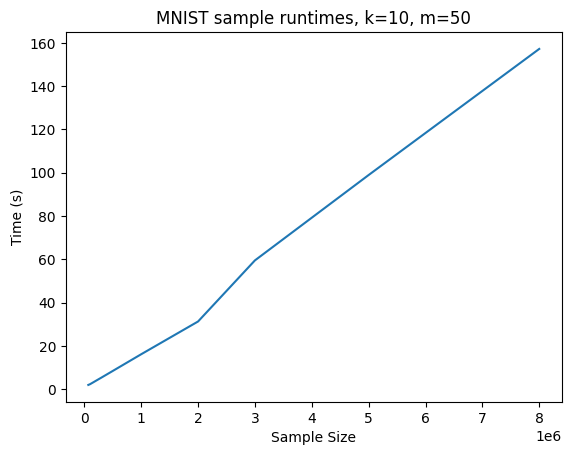

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

results_samples_df = pd.read_parquet(f"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist/samples/parquets/{parquet_name}.parquet")

fig, ax, _ = su.plot_sample_time_results(results_samples_df, save_path="plots/MNIST_sample_runtimes.png", title=f"MNIST sample runtimes, k={k}, m={m}")
plt.show()

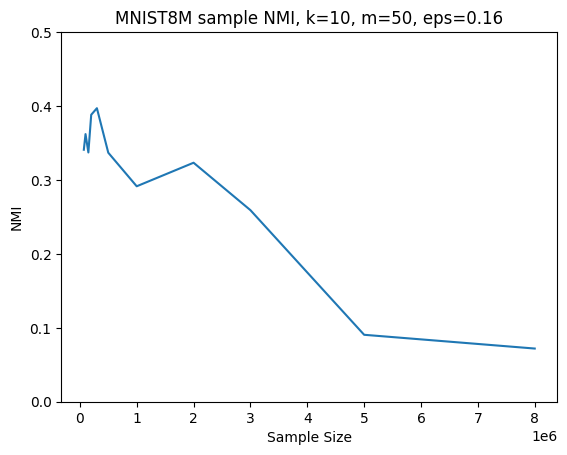

In [23]:
fig, ax = su.plot_sample_nmi_results(results_samples_df, save_path="plots/MNIST_sample_nmi.png", title=f"MNIST8M sample NMI, k={k}, m={m}, eps={eps}")
plt.show()

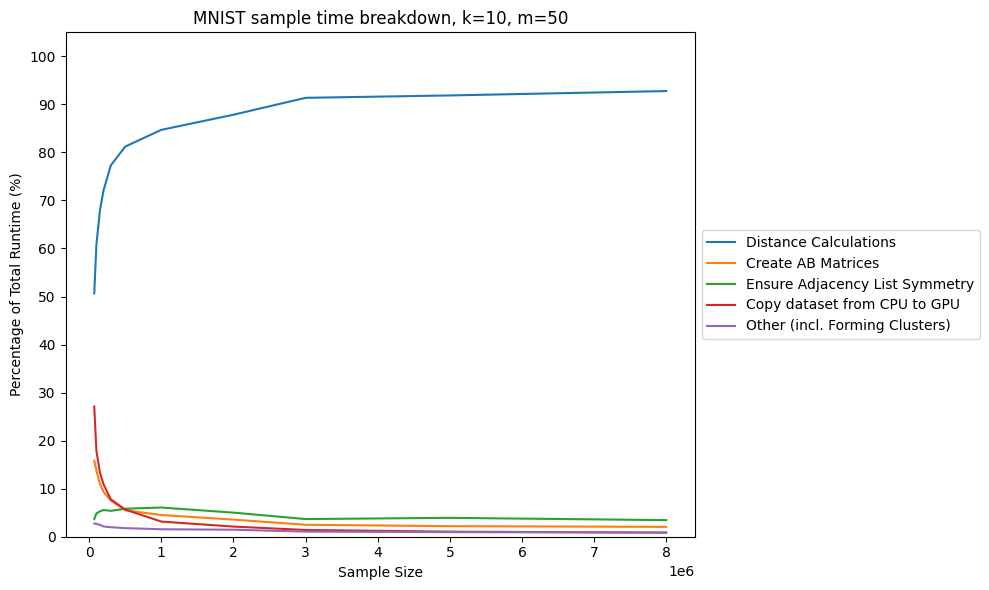

In [27]:
import pickle

fig, ax = su.plot_sample_time_breakdown_perc(results_samples_df, save_file="MNIST_sample_time_breakdown.png", title=f"MNIST sample time breakdown, k={k}, m={m}")

with open("fig_breakdown_mnist.pkl", "wb") as f:
    pickle.dump((fig, ax), f)

[(70000, 19), (100000, 34), (150000, 79), (200000, 106), (300000, 185), (500000, 368), (1000000, 766), (2000000, 1521), (3000000, 1953), (5000000, 523), (8000000, 314)]


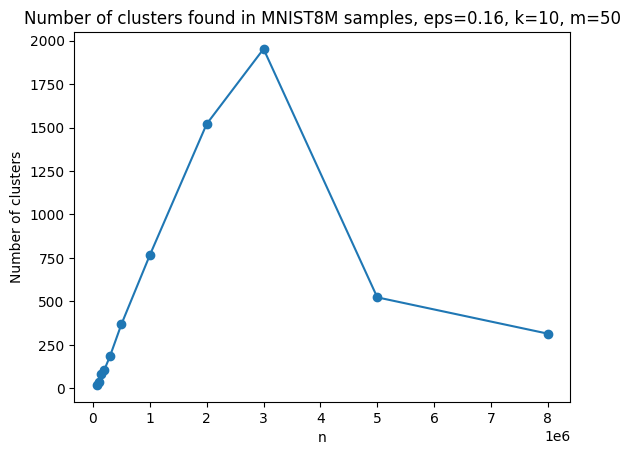

In [41]:
import matplotlib.pyplot as plt

n_vals = results_samples_df["params"].apply(lambda x: x["n"])
num_clusters_vals = results_samples_df["numClusters"]

eps = results_samples_df["params"].iloc[0]["eps"]
k = results_samples_df["params"].iloc[0]["k"]
m = results_samples_df["params"].iloc[0]["m"]

plt.plot(n_vals, num_clusters_vals, marker="o")
plt.title(f"Number of clusters found in MNIST8M samples, eps={eps}, k={k}, m={m}")
plt.xlabel("n")
plt.ylabel("Number of clusters")
plt.savefig(f"results_samples_eps{eps}_k{k}_m{m}_num_clusters.png", dpi=300)

print([(n, num_clusters) for n, num_clusters in zip(n_vals, num_clusters_vals)])

In [34]:
results_samples_df["params"].iloc[0]

{'d': 784,
 'minPts': 50,
 'eps': 0.16,
 'alpha': 1.2,
 'distancesBatchSize': 100,
 'distanceMetric': 'COSINE',
 'clusterBlockSize': 256,
 'miniBatchSize': 10000,
 'ABatchSize': 10000,
 'BBatchSize': 28,
 'normBatchSize': 10000,
 'sigmaEmbed': 1,
 'datasetDType': 'f16',
 'k': 10,
 'm': 50,
 'n': 70000,
 'D': 1024,
 'datasetFilename': '/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n70000_f16.bin',
 'labels_filename': '/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n70000_f16_labels.bin',
 'clusterOnCpu': True,
 'needToNormalize': True,
 'verbose': False,
 'useBatchDbscan': True,
 'useBatchABMatrices': True,
 'useBatchNorm': True,
 'timeIt': True,
 'print_cmd': True,
 'ignoreAdjListSymmetry': False}

In [23]:
k_m_values = [(40, 50), (20, 100), (10, 200), (5, 400), (2, 1000), (1, 2000), (2, 2000)]

eps = 0.11

dataset_file = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin"
labels_file = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_labels_f16.bin"

params = exp.RunParams(datasetFilename=dataset_file, labels_filename=labels_file, n=70_000, d=784, D=1024, minPts=50, eps=eps, alpha=1.2,
                        distancesBatchSize=100, distanceMetric="COSINE",
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=True, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType="f16", ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)

results_df = exp.run_k_m_experiments(k_m_vals=k_m_values, params=params, parquet_name="mnist_k_m_experiments.parquet")

tex = exp.get_k_m_experiments_table(k_m_values, results_df)

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist_images_row_major_f16_n70000_d784_D1024_mp50_k40_m50_e0.11.json --n 70000 --d 784 --D 1024 --minPts 50 --k 40 --m 50 --eps 0.11 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist_images_row_major_f16_n70000_d784_D1024_mp50_k40_m50_e0.11.json
n

In [24]:
print(tex)

\begin{tabular}{cccc}
\toprule
m & k & Time (s) & NMI \\
\midrule
50 & 40 & 4.866891 & 0.339230 \\
100 & 20 & 4.820136 & 0.358509 \\
200 & 10 & 4.923018 & 0.379413 \\
400 & 5 & 5.036126 & 0.397214 \\
1000 & 2 & 5.045484 & 0.406852 \\
2000 & 1 & 5.013765 & 0.409851 \\
2000 & 2 & 9.251704 & 0.424677 \\
\bottomrule
\end{tabular}



In [7]:
import numpy as np

eps_vals = np.arange(0.10, 0.2, 0.01)

file_name = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin"
labels_file = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16_labels.bin"

params = exp.RunParams(
    datasetFilename=file_name,
    labels_filename=labels_file,
    n=8_100_000,
    d=784,
    D=1024,
    minPts=50,
    k=10,
    m=50,
    alpha=1.2,
    distancesBatchSize=100,
    distanceMetric="COSINE",
    clusterBlockSize=256,
    clusterOnCpu=True,
    needToNormalize=True,
    print_cmd=True,
    verbose=False,
    useBatchDbscan=True,
    timeIt=True,
    useBatchABMatrices=True,
    useBatchNorm=True,
    datasetDType="f16",
    ABatchSize=10_000,
    BBatchSize=28,
    miniBatchSize=10_000,
    normBatchSize=10_000,
    ignoreAdjListSymmetry=False
)

results_df_eps = exp.run_eps_experiments(eps_vals, params, parquet_name="mnist8m_eps_experiments.parquet")

Running eps experiments:   0%|          | 0/10 [00:00<?, ?it/s]

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n8100000_f16_n8100000_d784_D1024_mp50_k10_m50_e0.1.json --n 8100000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.1 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n8100000_f16_n8100000_

Running eps experiments:  10%|█         | 1/10 [02:49<25:21, 169.04s/it]

Times...
adjList: 0.21
constructABMatrices: 3.20
copyClusteringArrays: 0.05
copyingAndConvertData: 1.43
degArray: 0.13
formClusters: 0.18
normalise: 0.10
overall: 152.31
processAdjacencyList: 1.54
startIdxArray: 0.40
totalTimeCopyMerge: 0.04
totalTimeDistances: 145.00


Number of clusters:  980


NMI:  0.13373613359793088


Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n8100000_f16_n8100000_d784_D1024_mp50_k10_m50_e0.11.json --n 8100000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.11 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatc

Running eps experiments:  20%|██        | 2/10 [05:37<22:28, 168.55s/it]

Times...
adjList: 0.21
constructABMatrices: 3.22
copyClusteringArrays: 0.05
copyingAndConvertData: 1.36
degArray: 0.12
formClusters: 0.26
normalise: 0.10
overall: 154.77
processAdjacencyList: 2.12
startIdxArray: 0.39
totalTimeCopyMerge: 0.04
totalTimeDistances: 146.87


Number of clusters:  1479


NMI:  0.188660768515422


Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n8100000_f16_n8100000_d784_D1024_mp50_k10_m50_e0.12.json --n 8100000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.12 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatch

Running eps experiments:  30%|███       | 3/10 [08:25<19:37, 168.26s/it]

Times...
adjList: 0.21
constructABMatrices: 3.22
copyClusteringArrays: 0.05
copyingAndConvertData: 1.36
degArray: 0.13
formClusters: 0.34
normalise: 0.10
overall: 155.05
processAdjacencyList: 2.02
startIdxArray: 0.39
totalTimeCopyMerge: 0.04
totalTimeDistances: 147.14


Number of clusters:  2025


NMI:  0.19736792883259663


Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n8100000_f16_n8100000_d784_D1024_mp50_k10_m50_e0.13.json --n 8100000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.13 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBat

Running eps experiments:  40%|████      | 4/10 [11:14<16:51, 168.53s/it]

Times...
adjList: 0.21
constructABMatrices: 3.22
copyClusteringArrays: 0.06
copyingAndConvertData: 1.39
degArray: 0.12
formClusters: 0.43
normalise: 0.10
overall: 155.93
processAdjacencyList: 2.51
startIdxArray: 0.40
totalTimeCopyMerge: 0.04
totalTimeDistances: 147.40


Number of clusters:  2643


NMI:  0.23671622075244592


Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n8100000_f16_n8100000_d784_D1024_mp50_k10_m50_e0.13999999999999999.json --n 8100000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.13999999999999999 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize

Running eps experiments:  50%|█████     | 5/10 [14:04<14:05, 169.17s/it]

Times...
adjList: 0.22
constructABMatrices: 3.22
copyClusteringArrays: 0.07
copyingAndConvertData: 1.41
degArray: 0.13
formClusters: 0.41
normalise: 0.10
overall: 157.35
processAdjacencyList: 3.41
startIdxArray: 0.40
totalTimeCopyMerge: 0.04
totalTimeDistances: 147.89


Number of clusters:  2297


NMI:  0.13750447174636274


Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n8100000_f16_n8100000_d784_D1024_mp50_k10_m50_e0.14999999999999997.json --n 8100000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.14999999999999997 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize

Running eps experiments:  60%|██████    | 6/10 [16:55<11:18, 169.71s/it]

Times...
adjList: 0.23
constructABMatrices: 3.23
copyClusteringArrays: 0.09
copyingAndConvertData: 1.42
degArray: 0.12
formClusters: 0.29
normalise: 0.10
overall: 158.08
processAdjacencyList: 4.46
startIdxArray: 0.39
totalTimeCopyMerge: 0.04
totalTimeDistances: 147.67


Number of clusters:  683


NMI:  0.09820387959721057


Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n8100000_f16_n8100000_d784_D1024_mp50_k10_m50_e0.15999999999999998.json --n 8100000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.15999999999999998 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize 

Running eps experiments:  70%|███████   | 7/10 [19:47<08:31, 170.53s/it]

Times...
adjList: 0.24
constructABMatrices: 3.23
copyClusteringArrays: 0.11
copyingAndConvertData: 1.38
degArray: 0.12
formClusters: 0.33
normalise: 0.10
overall: 159.46
processAdjacencyList: 5.98
startIdxArray: 0.39
totalTimeCopyMerge: 0.04
totalTimeDistances: 147.48


Number of clusters:  255


NMI:  0.0879579897561678


Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n8100000_f16_n8100000_d784_D1024_mp50_k10_m50_e0.16999999999999998.json --n 8100000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.16999999999999998 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize -

Running eps experiments:  80%|████████  | 8/10 [22:40<05:42, 171.31s/it]

Times...
adjList: 0.24
constructABMatrices: 3.21
copyClusteringArrays: 0.12
copyingAndConvertData: 1.37
degArray: 0.12
formClusters: 0.35
normalise: 0.10
overall: 160.08
processAdjacencyList: 6.49
startIdxArray: 0.39
totalTimeCopyMerge: 0.04
totalTimeDistances: 147.58


Number of clusters:  242


NMI:  0.075839763104955


Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f16/mnist8m_sample_n8100000_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_sample_n8100000_f16_n8100000_d784_D1024_mp50_k10_m50_e0.17999999999999997.json --n 8100000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.17999999999999997 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --

Running eps experiments:  80%|████████  | 8/10 [24:33<06:08, 184.20s/it]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

nmi = results_df_eps["nmi"].values

plt.plot(eps_vals, nmi)

In [ ]:
k = 2
m = 2000
eps = 0.16

mnist8m_filename = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/mnist8m_f16_X.bin"
mnist8m_labels_filename = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/mnist8m_y_8100000_784.bin"

params_mnist8m = exp.RunParams(datasetFilename=mnist8m_filename, labels_filename=mnist8m_labels_filename, n=8_100_000, d=784, D=1024, minPts=50, k=k, m=m, eps=eps, alpha=1.2,
                        distancesBatchSize=100, distanceMetric="COSINE",
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=True, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType="f16", ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)


results_mnist8m_single = exp.run_complete_sdbscan_pipeline(params_mnist8m, results_parquet_name=f"../results/mnist8m_single_k{k}_m{m}.parquet")

TypeError: run_complete_sdbscan_pipeline() got an unexpected keyword argument 'max_n'

In [7]:
d = 784
eps = 0.16
minPts = 50
k = 10
m = 50
numThreads = 64 # For testing, set to 64 for full run
dist = "Cosine"

run_params_cpu = exp_cpu.CpuRunParams(d, eps, minPts, 1024, k, m, numThreads, dist, datasetFilename=None, verbose=True,
                            output_file=None, file_type="bin", labels_filename=None,
                            labels_file_type="bin", interval_sampling=0)

In [5]:
results_samples_cpu_df = m_exp.run_mnist_samples_cpu(run_params_cpu, sample_results_df_name=f"mnist_samples_cpu_results_k{k}_m{m}_eps{eps}_nt{numThreads}_no_interval_sampling")

eps: 0.16
minPts: 50
n_points: 70000
n_features: 784
n_proj: 1024
topK: 10
topM: 50
distance: Cosine
cluster noise: 0
kernel features: 784
sigma: 2600
interval sampling: 0
sDbscan-1NN prob: 0
n_threads: 64
Check X supporting distance time = 108[ms]
Build index time = 243[ms]
Number of core points: 5970
Find core points time = 1828[ms]
Clustering noisy point time = 0[ms]
Number of clusters: 25
Form clusters time  (including clustering noise) = 4[ms]
Writing times to file: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist/samples/raw/cpu_mnist_samples_cpu_results_k10_m50_eps0.16_nt64_no_interval_sampling_n70000_times.txt
Times map written to file successfully.
NMI: 0.39808634136011795
eps: 0.16
minPts: 50
n_points: 100000
n_features: 784
n_proj: 1024
topK: 10
topM: 50
distance: Cosine
cluster noise: 0
kernel features: 784
sigma: 2600
interval sampling: 0
sDbscan-1NN prob: 0
n_threads: 64
Check X supporting distance time = 146[ms]
Build index time = 338[ms]
Number of core points: 8

[  3.213   4.129   6.11    8.172  12.338  21.223  42.526  87.227 137.009
 244.81  448.017]
[  1.955817   2.291894   3.048763   3.818554   5.336395   8.416144
  16.135082  31.265581  59.491717  98.941301 157.198206]
Average Speedup: 2.3159158206196597


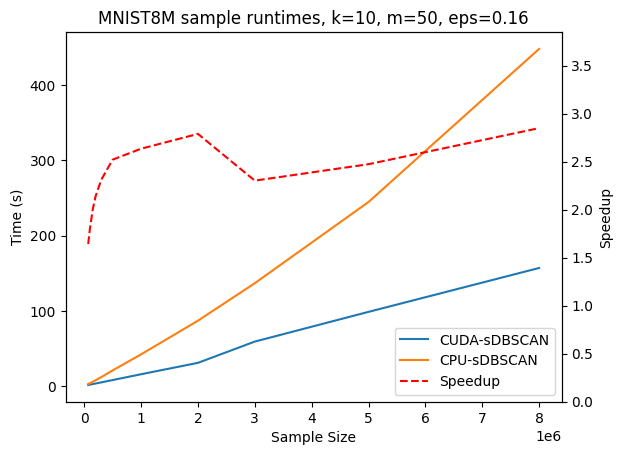

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

REPO_ROOT = "/home/hphi344/Documents/GS-DBSCAN-Analysis/"

plots_dir = f"{REPO_ROOT}/analysis_notebooks/plots/64_threads"

results_samples_df = pd.read_parquet(f"{REPO_ROOT}/results/mnist/samples/parquets/mnist_experiments_k{run_params_cpu.k}_m{run_params_cpu.m}_eps{run_params_cpu.eps}_f16.parquet")
results_samples_cpu_df = pd.read_parquet(f"{REPO_ROOT}/results/mnist/samples/parquets/mnist_samples_cpu_results_k{run_params_cpu.k}_m{run_params_cpu.m}_eps{run_params_cpu.eps}_nt{numThreads}.parquet")

# Convert cpu ms times to ns
for i in range(len(results_samples_cpu_df)):
    row = results_samples_cpu_df.iloc[i]
    for metric, time in row["times"].items():   
        row["times"][metric] = time/ 1e3

su.plot_compare_cpu_gpu_time(results_samples_df, results_samples_cpu_df, title=f"MNIST8M sample runtimes, k={run_params_cpu.k}, m={run_params_cpu.m}, eps={run_params_cpu.eps}", save_path = f"{plots_dir}/MNIST8M_sample_runtimes_nt{numThreads}", add_speedup=True)
# TODO multiply the times to get seconds

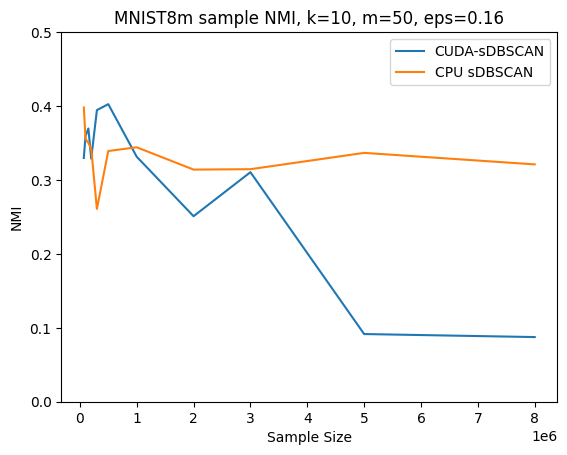

In [9]:
su.plot_compare_cpu_gpu_nmi(results_samples_df, results_samples_cpu_df, title = f"MNIST8m sample NMI, k={run_params_cpu.k}, m={run_params_cpu.m}, eps={run_params_cpu.eps}", save_path = f"{plots_dir}/MNIST8M_sample_nmi")

In [31]:
results_samples_cpu_df["params"].iloc[0]

{'d': 784,
 'eps': 0.16,
 'minPts': 50,
 'D': 1024,
 'k': 10,
 'm': 50,
 'numThreads': 16,
 'dist': 'Cosine',
 'n': 70000,
 'datasetFilename': '/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f32/mnist8m_sample_n70000_f32.bin',
 'verbose': True,
 'output_file': '/home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist/samples/raw/cpu_mnist_samples_cpu_results_k10_m50_eps0.16_nt16_n70000',
 'file_type': 'bin',
 'labels_filename': '/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/samples/f32/mnist8m_sample_n70000_f32_labels.bin',
 'labels_file_type': 'bin'}

In [ ]:
k = 5
m = 50
eps = 0.16

results_gpu_df, results_cpu_df = cpu_vs_gpu.compare_cpu_to_gpu_mnist8m(k, m, eps)

eps: 0.16
minPts: 50
n_points: 70000
n_features: 784
n_proj: 1024
topK: 5
topM: 50
distance: Cosine
cluster noise: 0
kernel features: 784
sigma: 2600
interval sampling: 0.4
sDbscan-1NN prob: 0.01
n_threads: 64
Check X supporting distance time = 106[ms]
Build index time = 235[ms]
Number of core points: 4083
Find core points time = 755[ms]
Clustering noisy point time = 0[ms]
Number of clusters: 34
Form clusters time  (including clustering noise) = 3[ms]
Writing times to file: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist/samples/cpu_mnist_samples_cpu_results_k5_m50_eps0.16_n70000_times.txt
Times map written to file successfully.
NMI: 0.3619605234609838
eps: 0.16
minPts: 50
n_points: 100000
n_features: 784
n_proj: 1024
topK: 5
topM: 50
distance: Cosine
cluster noise: 0
kernel features: 784
sigma: 2600
interval sampling: 0.4
sDbscan-1NN prob: 0.01
n_threads: 64
Check X supporting distance time = 161[ms]
Build index time = 343[ms]
Number of core points: 5600
Find core points time

In [ ]:
k = 10
m = 50
eps = 1350
distanceMetric = "L2"
needToNormalize = False

gpu_params = exp.RunParams(d=784, D=1024, minPts=50, k=k, m=m, eps=eps, alpha=1.2,
                        distancesBatchSize=100, distanceMetric=distanceMetric,
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=needToNormalize, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType="f16", ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)


results = m_exp.run_mnist8m_normal(gpu_params)

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist_images_row_major_f16_n70000_d784_D1024_mp50_k2_m2000_e1350.json --n 70000 --d 784 --D 1024 --minPts 50 --k 2 --m 2000 --eps 1350 --alpha 1.2 --distancesBatchSize 100 --distanceMetric L2 --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist_images_row_major_f16_n70000_d784_D1024_mp50_k2_m2000_e1350.json
n: 70000
d: 784
D: 1

In [ ]:
k = 10
m = 50
eps = 0.16
distanceMetric = "COSINE"
needToNormalize = True

gpu_params = exp.RunParams(d=784, D=1024, minPts=50, k=k, m=m, eps=eps, alpha=1.2,
                        distancesBatchSize=100, distanceMetric=distanceMetric,
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=needToNormalize, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType="f16", ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)


results = m_exp.run_mnist8m_normal(gpu_params, dtype="f16")

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/mnist8m_f16_X.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_f16_X_n8100000_d784_D1024_mp50_k10_m50_e0.1600.json --n 8100000 --d 784 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.16 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/mnist8m_f16_X.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist8m_f16_X_n8100000_d784_D1024_mp50_k10_m50_e0.1600.json
n: 8100000
d: 784
D: 1024
minPts: 50
k:

In [36]:
k = 2
m = 2000
eps = 0.11
distanceMetric = "COSINE"
needToNormalize = True

gpu_params = exp.RunParams(d=784, D=1024, minPts=50, k=k, m=m, eps=eps, alpha=1.2,
                        distancesBatchSize=100, distanceMetric=distanceMetric,
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=needToNormalize, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType="f16", ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)

results_mnist_df = m_exp.run_mnist_normal(gpu_params)

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist_images_row_major_f16_n70000_d784_D1024_mp50_k2_m2000_e0.1100.json --n 70000 --d 784 --D 1024 --minPts 50 --k 2 --m 2000 --eps 0.11 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist_images_row_major_f16_n70000_d784_D1024_mp50_k2_m2000_e0.1100

In [ ]:
d = 784
minPts = 50
k = 10
m = 50
eps = 0.16
numThreads = 64
dist = "Cosine"

run_params_cpu = exp_cpu.CpuRunParams(d, eps, minPts, 1024, k, m, numThreads, dist, datasetFilename=r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist8m/mnist8m_f32_X.bin", verbose=True,
                            output_file=f"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist8m/mnist8m_cpu_k{k}_m{m}_nt{numThreads}_eps{eps}", file_type="bin", labels_filename=r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_labels_f32.bin",
                            labels_file_type="bin", interval_sampling=0)

results_cpu = m_exp.run_mnist8m_normal_cpu(run_params_cpu, dtype="f32")

eps: 0.16
minPts: 50
n_points: 8100000
n_features: 784
n_proj: 1024
topK: 10
topM: 50
distance: Cosine
cluster noise: 0
kernel features: 784
sigma: 2600
interval sampling: 0
sDbscan-1NN prob: 0
n_threads: 64
Check X supporting distance time = 11518[ms]
Build index time = 28269[ms]
Number of core points: 197979
Find core points time = 447678[ms]
Clustering noisy point time = 0[ms]
Number of clusters: 3522
Form clusters time  (including clustering noise) = 610[ms]
Writing times to file: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist8m/mnist8m_cpu_k10_m50_nt64_eps0.16_times.txt
Times map written to file successfully.
NMI: 0.32057022682478686


In [ ]:
results_cpu["times"].iloc[0]["overall"] / 1e9 

488.075

In [37]:
mnist_filename = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major.bin"
mnist_labels_filename = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_labels.bin"

d = 784
minPts = 50
k = 2
m = 2000
eps = 0.11
numThreads = 64
dist = "Cosine"

run_params_cpu = exp_cpu.CpuRunParams(d, eps, minPts, 1024, k, m, numThreads, dist, datasetFilename=mnist_filename, verbose=True,
                            output_file=f"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist/mnist_cpu_k{k}_m{m}_nt{numThreads}_eps{eps}", file_type="bin", labels_filename=mnist_labels_filename,
                            labels_file_type="bin", interval_sampling=0, n=70_000)

In [38]:
exp_cpu.run_cpu_sdbscan(run_params_cpu)

eps: 0.11
minPts: 50
n_points: 70000
n_features: 784
n_proj: 1024
topK: 2
topM: 2000
distance: Cosine
cluster noise: 0
kernel features: 784
sigma: 2600
interval sampling: 0
sDbscan-1NN prob: 0
n_threads: 64
Check X supporting distance time = 100[ms]
Build index time = 223[ms]
Number of core points: 9168
Find core points time = 22833[ms]
Clustering noisy point time = 0[ms]
Number of clusters: 7
Form clusters time  (including clustering noise) = 9[ms]
Writing times to file: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist/mnist_cpu_k2_m2000_nt64_eps0.11_times.txt
Times map written to file successfully.
NMI: 0.4195265585159456


,params,nmi,numClusters,times
0,"{'d': 784, 'eps': 0.11, 'minPts': 50, 'D': 102...",0.419527,7,"{'buildIndexTime': 223000000.0, 'checkXSupport..."
